In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [70]:
df = pd.read_csv('../Downloads/voter_turnout_merged_all_states.csv')

#fill missing vals with zeros
df = df.fillna(0)

df.head()

,Residence_Addresses_City,elec_date,elec_year,elec_type,total_voters_asian,total_voters_black,total_voters_hispanic,total_voters_others,total_voters_white,voted_voters_asian,...,total_voters_college,total_voters_no_college,voted_voters_college,voted_voters_no_college,perc_turnout_college,perc_turnout_no_college,mean_age,voter_population,voted_voters,state
0,Oakland,2020_11_03,2020,General,30600.0,61476.0,37174.0,8628.0,83122,23041.0,...,80668,27989.0,71356,22543.0,88.456389,80.542356,47.829424,331652,172221,CA
1,Oakland,2018_11_06,2018,General,30600.0,61476.0,37174.0,8628.0,83122,14972.0,...,80668,27989.0,59248,17372.0,73.446720,62.067241,48.224196,331652,130249,CA
2,Oakland,2016_11_08,2016,General,30600.0,61476.0,37174.0,8628.0,83122,16057.0,...,80668,27989.0,60766,18951.0,75.328507,67.708743,46.819512,331652,135633,CA
3,Oakland,2014_11_04,2014,General,30600.0,61476.0,37174.0,8628.0,83122,8145.0,...,80668,27989.0,38216,10811.0,47.374424,38.625889,51.034918,331652,75153,CA
4,San Leandro,2020_11_03,2020,General,12705.0,5596.0,16028.0,2429.0,17780,9229.0,...,19051,10653.0,16014,8674.0,84.058580,81.423073,49.752550,70359,41879,CA


# Income Bracket Visualizations

In [71]:
#breakout data by election type
consolidated_general_df = df[df['elec_type']=='Consolidated_General']
general_df = df[df['elec_type']=='General']
local_municipal_df = df[df['elec_type']=='Local_or_Municipal']

In [72]:
#select income cols
ordered_income_cols = ['voted_voters_$1000-14999',
                      'voted_voters_$15000-24999',
                      'voted_voters_$25000-34999',
                      'voted_voters_$35000-49999',
                      'voted_voters_$50000-74999',
                      'voted_voters_$75000-99999',
                      'voted_voters_$100000-124999',
                      'voted_voters_$125000-149999',
                      'voted_voters_$150000-174999',
                      'voted_voters_$175000-199999',
                      'voted_voters_$200000-249999',
                      'voted_voters_$250000+']

general_df = general_df[ordered_income_cols]
general_df.head()

,voted_voters_$1000-14999,voted_voters_$15000-24999,voted_voters_$25000-34999,voted_voters_$35000-49999,voted_voters_$50000-74999,voted_voters_$75000-99999,voted_voters_$100000-124999,voted_voters_$125000-149999,voted_voters_$150000-174999,voted_voters_$175000-199999,voted_voters_$200000-249999,voted_voters_$250000+
0,4179.0,3874.0,6246.0,15054.0,29142.0,18293.0,19409.0,14944.0,15834.0,10419.0,18735.0,12982.0
1,2998.0,2789.0,4477.0,10005.0,19886.0,13605.0,14927.0,11978.0,12561.0,8530.0,15607.0,10693.0
2,3310.0,3019.0,4908.0,11161.0,21635.0,14295.0,15288.0,12110.0,12588.0,8649.0,15673.0,10681.0
3,1764.0,1667.0,2726.0,5438.0,10653.0,7597.0,8225.0,7050.0,7068.0,5390.0,9922.0,6529.0
4,661.0,955.0,971.0,2087.0,6114.0,8725.0,7193.0,6066.0,2515.0,2193.0,1875.0,2158.0


In [73]:
#create lookup with stand-in values for each bracket
income_lookup = {'voted_voters_$1000-14999': 10000,
                      'voted_voters_$15000-24999': 20000,
                      'voted_voters_$25000-34999': 30000,
                      'voted_voters_$35000-49999': 40000,
                      'voted_voters_$50000-74999': 62500,
                      'voted_voters_$75000-99999': 87500,
                      'voted_voters_$100000-124999': 112500,
                      'voted_voters_$125000-149999': 137500,
                      'voted_voters_$150000-174999': 162500,
                      'voted_voters_$175000-199999': 187500,
                      'voted_voters_$200000-249999': 212500,
                      'voted_voters_$250000+': 262500}

In [74]:
from tqdm import tqdm

#function to turn counts by category into a list that can be used for boxplots
def get_incomes_list(df):
    output = []
    for col in tqdm(ordered_income_cols):
        val = income_lookup[col]
        for count in df[col]:
            for _ in range(int(count)):
                output.append(val)
    return output

100%|██████████| 12/12 [00:00<00:00, 163.61it/s]


Text(0.5, 0, 'Election Type')

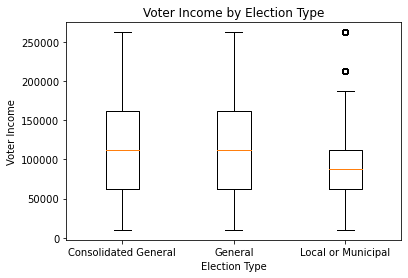

In [75]:
#boxplots for income by election type

consolidated_general_incomes = get_incomes_list(consolidated_general_df)
general_incomes = get_incomes_list(general_df)
local_municipal_incomes = get_incomes_list(local_municipal_df)

plot_vals = [consolidated_general_incomes, general_incomes, local_municipal_incomes]

plt.boxplot(plot_vals, labels = ['Consolidated General', 'General', 'Local or Municipal'])
plt.title('Voter Income by Election Type')
plt.ylabel('Voter Income')

In [76]:
#breakout data by rcv vs. non-rcv
rcv_cities = ['Albany', 'Berkeley', 'Eureka', 'Oakland', 'Palm Desert', 'San Francisco', 'San Leandro',
             'Las Cruces', 'Santa Fe', 'Boulder', 'Burlington', 'Portland', 'Takoma Park', 'Bluffdale',
             'Payson', 'Cottonwood Heights', 'Salt Lake City', 'Sandy', 'Midvale', 'Draper', 'Lehi',
             'Springville', 'South Salt Lake', 'Magna', 'Heber', 'Millcreek', 'Riverton', 'St. Louis Park',
             'Bloomington', 'Minneapolis', 'Minnetonka']
non_rcv_cities = list(set(df['Residence_Addresses_City']) - set(rcv_cities))

rcv_df = df[df['Residence_Addresses_City'].isin(rcv_cities)]
non_rcv_df = df[df['Residence_Addresses_City'].isin(non_rcv_cities)]

100%|██████████| 12/12 [00:01<00:00,  7.98it/s]


Text(0, 0.5, 'Voter Income')

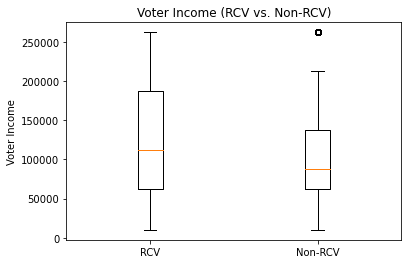

In [77]:
#boxplots for income (rcv vs. non-rcv)

rcv_incomes = get_incomes_list(rcv_df)
non_rcv_incomes = get_incomes_list(non_rcv_df)

plot_vals = [rcv_incomes, non_rcv_incomes]

plt.boxplot(plot_vals, labels = ['RCV', 'Non-RCV'])
plt.title('Voter Income (RCV vs. Non-RCV)')
plt.ylabel('Voter Income')